In [ ]:
!pip install turicreate


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.0 MB 18 kB/s 
     |████████████████████████████████| 86.4 MB 72 kB/s 
     |████████████████████████████████| 322 kB 23.0 MB/s 
     |████████████████████████████████| 3.6 MB 60.9 MB/s 
     |████████████████████████████████| 3.5 MB 50.8 MB/s 
     |████████████████████████████████| 18.3 MB 550 kB/s 
     |████████████████████████████████| 3.8 MB 58.6 MB/s 
     |████████████████████████████████| 2.9 MB 50.4 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 449 kB 48.5 MB/s 
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13714 sha256=bf6629e47d3760b8ce3eb1359c8ef602c938c529bda0c0d340cf9c7e65f45ef8
  Stored in directory: /root/.cache/pip/wheels/b2/7f/f6/f180315b584f00445045ff1699b550fa895d09471337ce21c6


In [ ]:
import turicreate as tc
import turicreate.aggregate as agg

In [ ]:
image_train = tc.SFrame('/content/drive/MyDrive/ML/Machine Learning- Coursera/image_train_data')
image_test = tc.SFrame('/content/drive/MyDrive/ML/Machine Learning- Coursera/image_test_data')

In [ ]:
image_train

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


In [ ]:
sketch = tc.Sketch(image_train['label'])

In [ ]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [ ]:
cat = image_train[image_train['label'] == 'cat']
dog = image_train[image_train['label'] == 'dog']
automobile = image_train[image_train['label'] == 'automobile']
bird = image_train[image_train['label'] == 'bird']

In [ ]:
cat_model = tc.nearest_neighbors.create(cat,label='id',features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
dog_model = tc.nearest_neighbors.create(dog,label='id',features=['deep_features'])
bird_model = tc.nearest_neighbors.create(bird,label='id',features=['deep_features'])
automobile_model = tc.nearest_neighbors.create(automobile,label='id',features=['deep_features'])

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
cat_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 23.429ms     |

| Done         |         | 100         | 86.453ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

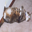

In [ ]:
image_train[image_train['id'] == 16289]['image'].explore()

In [ ]:
dog_model.query(image_test[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 20.302ms     |

| Done         |         | 100         | 79.11ms      |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

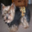

In [ ]:
image_train[image_train['id'] == 16976]['image'].explore()

In [ ]:
cat_test_data = image_test[image_test['label']=='cat']
dog_test_data = image_test[image_test['label']=='dog']
automobile_test_data = image_test[image_test['label']=='automobile']
bird_test_data = image_test[image_test['label']=='bird']

In [ ]:
dog_cat_neighbors = cat_model.query(dog_test_data,k=1)
dog_dog_neighbors = dog_model.query(dog_test_data,k=1)
dog_bird_neighbors = bird_model.query(dog_test_data,k=1)
dog_automobile_neighbors = automobile_model.query(dog_test_data,k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 254000  | 49.9018     | 708.487ms    |

| Done         | 509000  | 100         | 718.445ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 695.382ms    |

| Done         | 509000  | 100         | 712.073ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 239000  | 50          | 662.623ms    |

| Done         | 478000  | 100         | 669.243ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 2

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 255000  | 50.0982     | 675.035ms    |

| Done         | 509000  | 100         | 706.676ms    |

+--------------+---------+-------------+--------------+

In [ ]:
dog_distances = tc.SFrame({'dog_dog' : dog_dog_neighbors['distance'] , 'dog_cat' : dog_cat_neighbors['distance'], 'dog_bird' : dog_bird_neighbors['distance'], 'dog_automobile' : dog_automobile_neighbors['distance']})

In [ ]:
dog_distances.head()

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [ ]:
Row = dog_distances[0]

In [ ]:
def is_dog_correct(row) :
 if row['dog_dog'] < row['dog_cat'] and row['dog_dog'] < row['dog_bird'] and row['dog_dog'] < row['dog_automobile'] :
   return 1
 else :
   return 0

In [ ]:
dog_distances['correct_or_not'] = dog_distances.apply(is_dog_correct)

In [ ]:
dog_distances

dog_automobile,dog_bird,dog_cat,dog_dog,correct_or_not
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335,1
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554,1
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584,1
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193,1
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636,0
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124,1
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545,1
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034,1
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838,1
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455,0


In [ ]:
dog_distances.groupby(key_column_names=['correct_or_not'], operations={'count' : agg.COUNT()})

correct_or_not,count
0,322
1,678
